# ANÁLISIS Z2
nivel de prioridad: $\color{yellow}{Medio}$

Vamos a ver que le pasa a la señl cuando vamos girando la antena y le aumentamos el anguro con respecto a la vertical

In [1]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
from matplotlib import pyplot as plt

import os

In [2]:
%run FFT_ordenada.ipynb
%run to_baseband.ipynb
%run to_dB.ipynb

In [3]:
## Parámetros de la medición

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 

portadora = 'Fc8'
#=====================
if portadora== 'Fc7':
    fc = 7.290e9 # frecuencia portadora
    Fc = '7.29GHz'
elif portadora== 'Fc8':
    fc = 8.748e9
    Fc = '8.74GHz'
else:
    print('Error: portadora debe ser Fc7 o Fc8')
#======================

altura = '2/'
D, h = '44cm', 0.44

tita= [5, 10, 15, 20, 25, 30, 40, 50]

In [4]:
##----------------PREPROCESAMIENTO DE LAS SEÑALES----------------------------##

sistema = 'windows'

if sistema == 'ubuntu':
    ##----Ubuntu----##
    #código para gordotony#
    path_S1 = '/home/gordotony/Documents/GitHub/tesis/mediciones_09_06/S1/'
    path_S2 = '/home/gordotony/Documents/GitHub/tesis/mediciones_09_06/S2/'
    path_Z2 = '/home/gordotony/Documents/GitHub/tesis/mediciones_09_06/Z2/'
    
    # cuento el número de archivos S1 en el directorio
    med_S = os.listdir(path_S1+portadora+'/'+altura)
    N_med_S = int(len(med_S))
    print('# mediciones para S1 a altura',D,'=',N_med_S)

    # miro la longitud de cada mediciòn S1
    L_data_S1 = np.zeros(N_med_S, dtype=int)

    for i in range(N_med_S): 
        I = str(i+1)
        len_data_S1 = int(len(open(path_S1+portadora+'/'+altura+I+'_S1.txt').readlines()))
        L_data_S1[i] = len_data_S1
        print('medición #'+I+' =',len_data_S1)

    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    
    #cuento el numero de archivos Z2 e el directorio
    med_Z = os.listdir(path_Z2+portadora+'/')
    N_med_Z = int(len(med_Z))
    print()
    print('# de angulos =', N_med_Z)

    for j in range(N_med_Z): 
        J = str(j+1)

        #veo cantidad de repeticiones
        rep = os.listdir(path_Z2+portadora+'/'+'tita'+J)
        N_rep = int(len(rep))

        print('# de repeticiones =', N_rep)

        # miro la longitud de cada mediciòn Z2
        L_data_Z2 = np.zeros(N_rep, dtype=int)

        for k in range(N_rep):
            K = str(k+1)
            len_data_Z2 = int(len(open(path_Z2+portadora+'/'+'tita'+J+'/'+K+'.txt').readlines()))
            L_data_Z2[k] = len_data_Z2
            print('longitud medición #'+K+' =',len_data_Z2)
        print()

    print('Si los tamaños de todaqs las medicioes son iguales se puede cotinuar, sino ay que recortar los archivos')
    
    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#
    path_S1 = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06\S1'
    path_S2 = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06\S2'
    path_Z2 = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06\Z2'
    
    # cuento el número de archivos S1 en el directorio
    med_S = os.listdir(path_S1+'\\'+portadora+'\\'+altura)
    N_med_S = int(len(med_S))
    print('# mediciones para S1 a altura',D,'=',N_med_S)

    # miro la longitud de cada mediciòn S1
    L_data_S1 = np.zeros(N_med_S, dtype=int)

    for i in range(N_med_S): 
        I = str(i+1)
        len_data_S1 = int(len(open(path_S1+'\\'+portadora+'\\'+altura+'\\'+I+'_S1.txt').readlines()))
        L_data_S1[i] = len_data_S1
        print('medición #'+I+' =',len_data_S1)

    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    # cuento el número de archivos S2 en el directorio
    med_S2 = os.listdir(path_S2+'\\'+portadora+'\\'+altura)
    N_med_S2 = int(len(med_S2))
    print('# mediciones para S2 a altura',D,'=',N_med_S2)

    # miro la longitud de cada mediciòn S1
    L_data_S2 = np.zeros(N_med_S2, dtype=int)

    for i in range(N_med_S2): 
        I = str(i+1)
        len_data_S2 = int(len(open(path_S2+'\\'+portadora+'\\'+altura+'\\'+I+'_S2.txt').readlines()))
        L_data_S2[i] = len_data_S2
        print('medición #'+I+' =',len_data_S2)

    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    #cuento el numero de archivos Z2 e el directorio
    med_Z = os.listdir(path_Z2+'\\'+portadora+'\\')
    N_med_Z = int(len(med_Z))
    print()
    print('# de angulos =', N_med_Z)

    for j in range(N_med_Z): 
        J = str(j+1)

        #veo cantidad de repeticiones
        rep = os.listdir(path_Z2+'\\'+portadora+'\\'+'tita'+J)
        N_rep = int(len(rep))

        print('# de repeticiones =', N_rep)

        # miro la longitud de cada mediciòn Z2
        L_data_Z2 = np.zeros(N_rep, dtype=int)

        for k in range(N_rep):
            K = str(k+1)
            len_data_Z2 = int(len(open(path_Z2+'\\'+portadora+'\\'+'tita'+J+'\\'+K+'.txt').readlines()))
            L_data_Z2[k] = len_data_Z2
            print('longitud medición #'+K+' =',len_data_Z2)
        print()

    print('Si los tamaños de todaqs las medicioes son iguales se puede cotinuar, sino ay que recortar los archivos')
else:
    print('elegir sistema operativo')


# mediciones para S1 a altura 44cm = 5
medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# mediciones para S1 a altura 44cm = 5
medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# de angulos = 8
# de repeticiones = 3
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285

# de repeticiones = 3
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285

# de repeticiones = 3
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285

# de repeticiones = 3
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285

# de repeticiones = 3
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285

# de repeticiones = 3
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285

# de repeticiones = 3
longitud med

tamaño de S1 = (284,)
tamaño de S2 = (284,)
tamaño de Z2 = (284, 8)


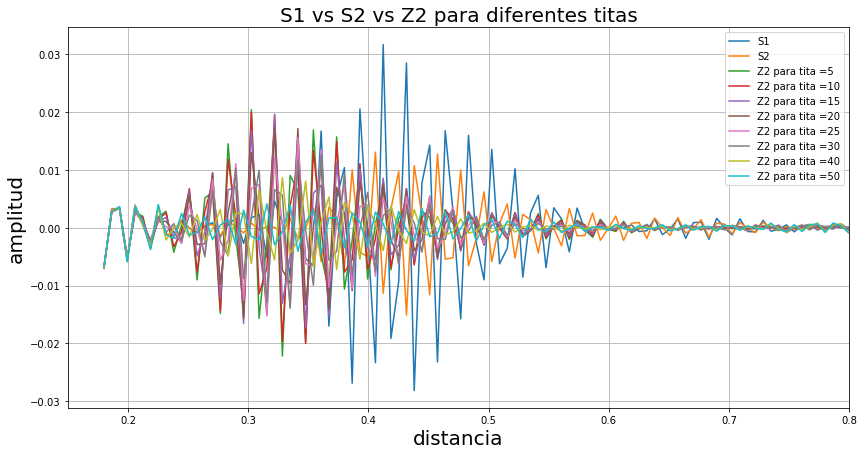

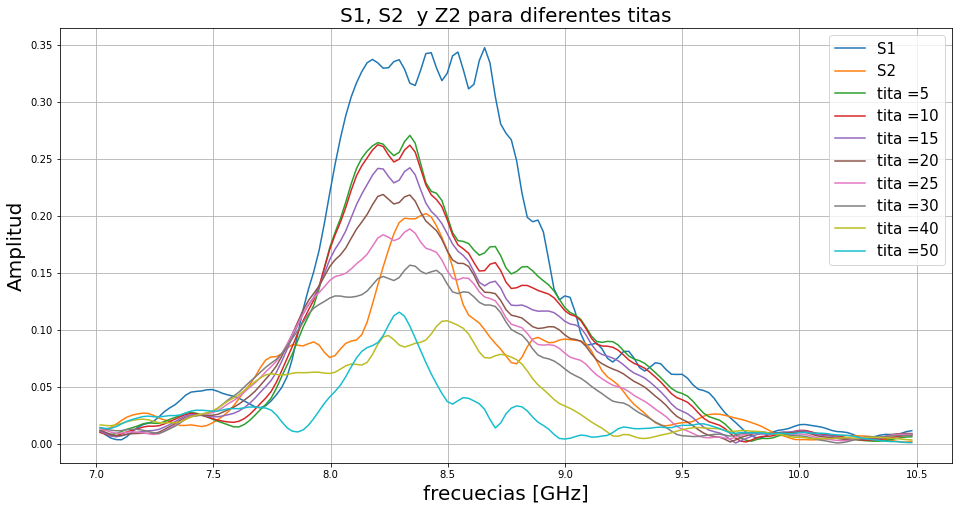

In [5]:
S1 = np.zeros((int(len_data_S1-1),11,N_med_S),dtype=float)
S2 = np.zeros((int(len_data_S2-1),11,N_med_S2),dtype=float)
Z2 = np.zeros((int(len_data_Z2-1),11,N_med_Z,N_rep),dtype=float)

if sistema == 'ubuntu':
    #importo S1
    for i0 in range(N_med_S):
        I0 = str(i0+1)
        S1[:,:,i0] = np.genfromtxt(path_S1+portadora+'/'+altura+I0+'_S1.txt', delimiter=' ')

    #importo los Z2
    for j0 in range(N_med_Z):
        J0 = str(j0+1)

        for k0 in range(N_rep):
            K0 = str(k0+1)

            Z2[:,:,j0,k0] = np.genfromtxt(path_Z2+portadora+'/'+'tita'+J0+'/'+K0+'.txt', delimiter=' ')
    
        
elif sistema =='windows':
    
    #importo S1
    for i0 in range(N_med_S):
        I0 = str(i0+1)
        S1[:,:,i0] = np.genfromtxt(path_S1+'\\'+portadora+'\\'+altura+'\\'+I0+'_S1.txt', delimiter=' ')

    #importo S2
    for i1 in range(N_med_S):
        I1 = str(i1+1)
        S2[:,:,i1] = np.genfromtxt(path_S2+'\\'+portadora+'\\'+altura+'\\'+I1+'_S2.txt', delimiter=' ')

    #importo los Z2
    for j0 in range(N_med_Z):
        J0 = str(j0+1)

        for k0 in range(N_rep):
            K0 = str(k0+1)

            Z2[:,:,j0,k0] = np.genfromtxt(path_Z2+'\\'+portadora+'\\'+'tita'+J0+'\\'+K0+'.txt', delimiter=' ')

else:
    print('defnir sistema operativo')

#promedio    
dist = S1[:,0,0]
S1_avg  = np.mean(S1[:,1:,:],axis=1)
S1_avg = np.mean(S1_avg[:,0:],axis=1)
print('tamaño de S1 =',np.shape(S1_avg))

S2_avg  = np.mean(S2[:,1:,:],axis=1)
S2_avg = np.mean(S2_avg[:,0:],axis=1)
print('tamaño de S2 =',np.shape(S2_avg))

Z2_avg = np.mean(Z2[:,1:,:,:],axis=1)
Z2_avg = np.mean(Z2_avg[:,:,0:],axis=2)
print('tamaño de Z2 =',np.shape(Z2_avg))

#grafico
plt.figure(figsize=(14,7))
plt.plot(dist,S1_avg,label='S1')
plt.plot(dist,S2_avg,label='S2')

for j2 in range(N_med_Z):
    plt.plot(dist, Z2_avg[:,j2],label='Z2 para tita ='+str(tita[j2]))

plt.grid('on')
plt.legend(loc="best",fontsize=10)
plt.xlabel('distancia',fontsize=20)
plt.xlim(0.15,0.8)
plt.ylabel('amplitud',fontsize=20)
plt.title('S1 vs S2 vs Z2 para diferentes titas',fontsize=20)
plt.show()

#Transformo fourier
Nfft= 1024

S1_fft = np.zeros(Nfft,dtype=complex)
S2_fft = np.zeros(Nfft,dtype=complex)
Z2_fft = np.zeros((Nfft,N_med_Z),dtype=complex)

frec_fft, S1_fft = FFT_ordenada(S1_avg,Nfft,Ts)
S2_fft = FFT_ordenada(S2_avg,Nfft,Ts)[1]

for j1 in range(N_med_Z):
    Z2_fft[:,j1] = FFT_ordenada(Z2_avg[:,j1],Nfft,Ts)[1]

#corto frecuecias
Deltaf = 1.75e9
f_min = fc-Deltaf
f_max = fc+Deltaf
#f_min, f_max = 6.5e9, 11e9

f_pos = frec_fft[(frec_fft>f_min) & (frec_fft<f_max)]
n_frecs = len(f_pos)
start = int(np.min(np.where(frec_fft>f_min)))
end = int(np.max(np.where(frec_fft<f_max))+1)
f_norm = f_pos/1e9 # frec >0 normalizada en GHz


#grafico
plt.figure(figsize=(16,8))
plt.plot(f_norm,np.abs(S1_fft[start:end]),label='S1')
plt.plot(f_norm,np.abs(S2_fft[start:end]),label='S2')

for j2 in range(N_med_Z):
    plt.plot(f_norm,np.abs(Z2_fft[start:end,j2]),label='tita ='+ str(tita[j2]))

plt.grid('on')
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuecias [GHz]',fontsize=20)
plt.ylabel('Amplitud',fontsize=20)
plt.title('S1, S2  y Z2 para diferentes titas',fontsize=20)
plt.show()    

(284, 8)


Text(0.5, 1.0, 'S1, S2 y Z2 en BB')

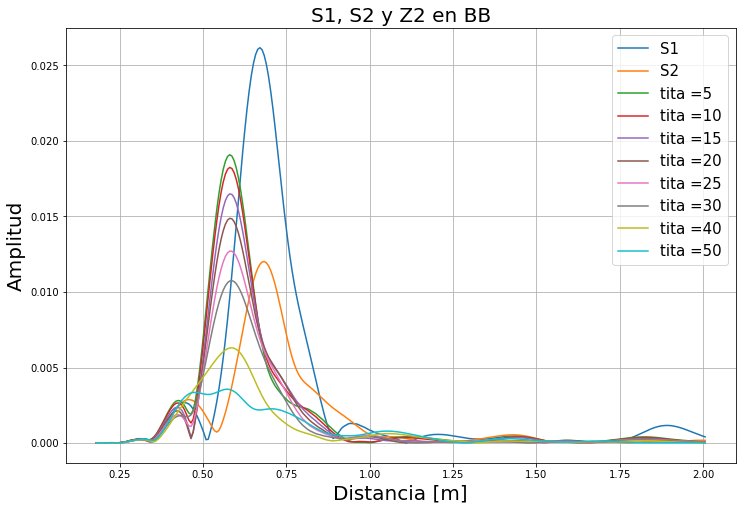

In [6]:
plt.figure(figsize=(12,8))
S1_BB = np.zeros_like(S1_avg,dtype=complex)
S1_BB = to_baseband(S1_avg,Ts,BW,fc)
plt.plot(dist,np.abs(S1_BB),label='S1')

S2_BB = np.zeros_like(S2_avg,dtype=complex)
S2_BB = to_baseband(S2_avg,Ts,BW,fc)
plt.plot(dist,np.abs(S2_BB),label='S2')

Z2_BB = np.zeros_like(Z2_avg,dtype=complex)
print(np.shape(Z2_BB))

for j in range(N_med_Z):
    Z2_BB[:,j] = to_baseband(Z2_avg[:,j],Ts,BW,fc)
    plt.plot(dist,np.abs(Z2_BB[:,j]),label='tita ='+str(tita[j]))

plt.grid('on')
plt.legend(loc="best",fontsize=15)
plt.xlabel('Distancia [m]',fontsize=20)
plt.ylabel('Amplitud',fontsize=20)
plt.title('S1, S2 y Z2 en BB',fontsize=20)

Text(0.5, 1.0, 'amplitudes maximas para |S1|, |S2| y |Z2| en func. de tita')

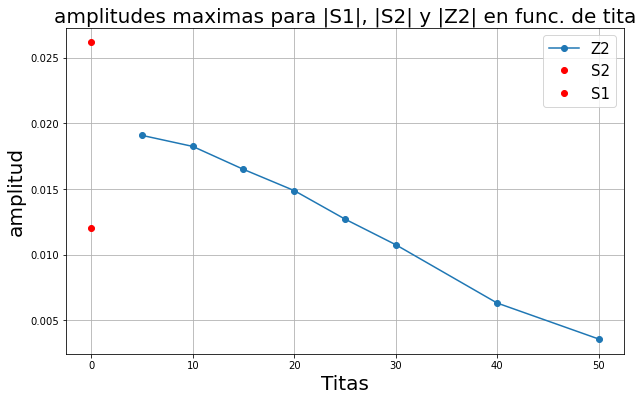

In [7]:
S1_max = np.max(np.abs(S1_BB))
S2_max = np.max(np.abs(S2_BB))
Z2_max = np.max(np.abs(Z2_BB), axis=0)

#obs: grafico lineal
plt.figure(figsize=(10,6))
plt.plot(tita,Z2_max,'-o',label='Z2')
plt.plot(0, S2_max, 'or', label='S2')
plt.plot(0, S1_max, 'or', label='S1')
plt.grid('on')
plt.legend(loc="best", fontsize=15)
plt.xlabel('Titas',fontsize=20)
plt.ylabel('amplitud',fontsize=20)
plt.title('amplitudes maximas para |S1|, |S2| y |Z2| en func. de tita',fontsize=20)


# miniconclusion:
Graficando las mediciones con los angulos de incidencia VS S1 y S2 para incidencia normal se ve que hay mucha diferencia. 

La señal S2 esta muy atenuada---> por que? explicacion fisica??

no se puede comparar con otras alturas porque los angulos de incidencia solo se hicieron a 45cm para que la huella del radar no se haga inmensa


idea: En incidencia normal tenemos el decaimiento de la señal en la skin depth y perdemos razonablemente intensidad de señal. Incidiendo de manera oblicua en el medio ayuda a que sea menor la atenuacion y por eso recuperamos mayor amplitud?? 
Habria que hacer las cuentas y ver que pasa con la parte compleja de la exponencial cuando tita es diferente a 0. ahora en la cabeza no lo tengo. Puede ser interesante.